# Training

In [1]:
from pathlib import Path
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from torch.utils.data import Dataset, DataLoader
import torch

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import GROUP1A, EXTRACTED_DATA_DIR
from src.processing import dataset
from models import lstm_model
from src import utils

C:\Users\gwd007\Documents\Exjobb


In [ ]:
group = GROUP1A
data = dataset.StrainDataset(EXTRACTED_DATA_DIR, GROUP1A, sequence_length=128)
train_loader = data.train_dataloader

# print(data.train_data)
# Access the data loaders directly from the class instance

input_dim = len(group)
hidden_dim=64
num_layers=1
num_epochs=5
learning_rate=0.001

model = lstm_model.LSTMModel(input_dim, hidden_dim, num_layers)

losses, prediction = lstm_model.training_loop(model, train_loader, num_epochs, learning_rate)

train_loader = data.train_dataloader

c:\Users\gwd007\Documents\Exjobb\src\processing\dataset.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\Users\dev-admin\Desktop\build42\libtorch_1738271764196\work\torch\csrc\utils\tensor_new.cpp:281.)
  self.sequences = torch.tensor(self.sequences, dtype=torch.float32)
Epoch 1/5: 100%|██████████| 350/350 [00:03<00:00, 108.34batch/s]



Epoch 1/5, Average Loss: 0.0172



Epoch 2/5: 100%|██████████| 350/350 [00:03<00:00, 105.40batch/s]



Epoch 2/5, Average Loss: 0.0032



Epoch 3/5: 100%|██████████| 350/350 [00:03<00:00, 106.87batch/s]



Epoch 3/5, Average Loss: 0.0022



Epoch 4/5: 100%|██████████| 350/350 [00:03<00:00, 112.12batch/s]



Epoch 4/5, Average Loss: 0.0013



Epoch 5/5: 100%|██████████| 350/350 [00:03<00:00, 106.75batch/s]


Epoch 5/5, Average Loss: 0.0009



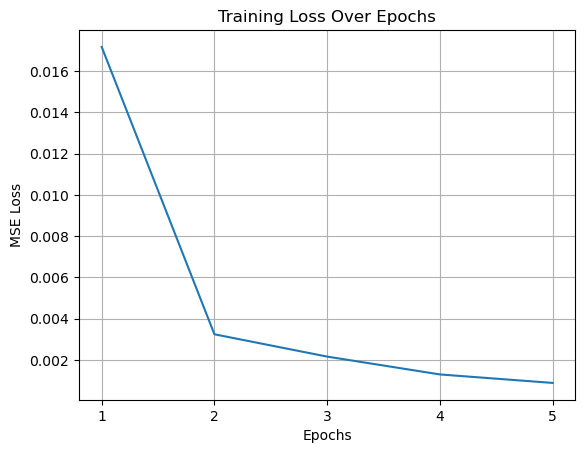

In [3]:
utils.plot_epochs_loss(num_epochs, losses)

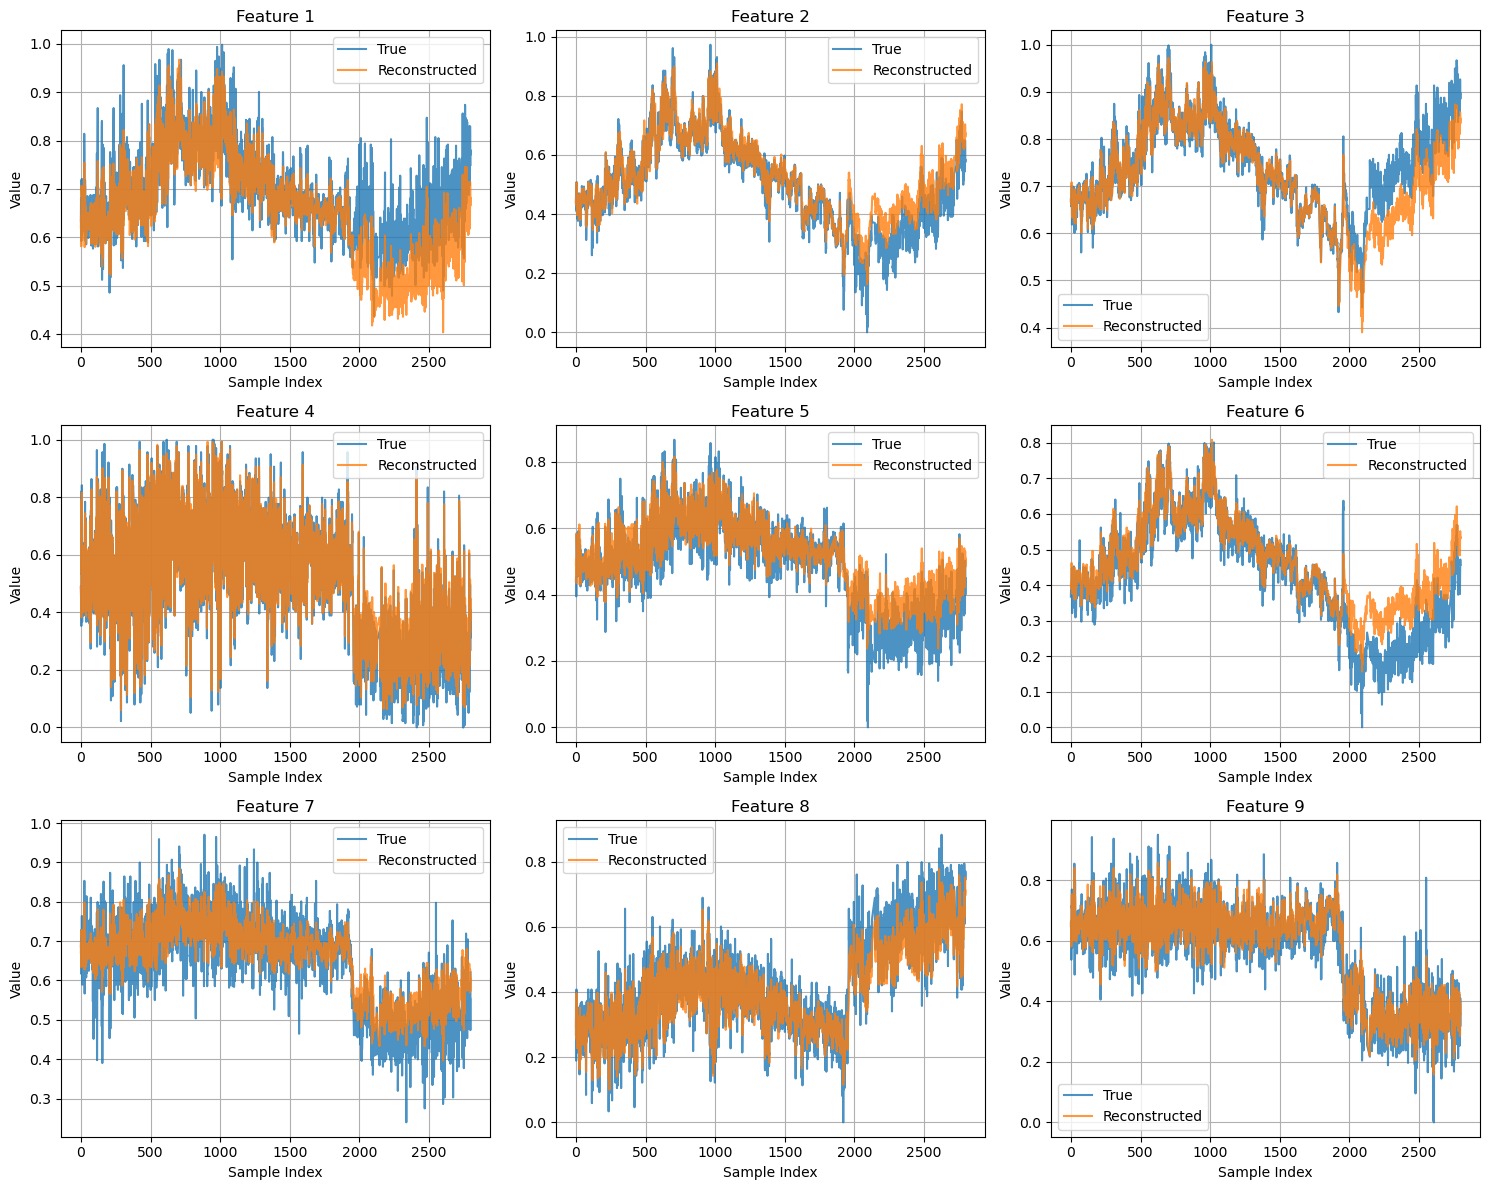

In [4]:
N = len(data.test_data)

utils.plot_reconstruction(data.test_data, model, N)

In [5]:
# import plotly.graph_objects as go
# import torch
# import numpy as np
# import pandas as pd

# # Get timestamps from data
# timestamps = data.get_timestamps()

# # Convert timestamps to a NumPy array and then to pandas datetime format
# timestamps = np.concatenate(timestamps)  # Flatten the list if needed
# timestamps = pd.to_datetime(timestamps)  # Convert to datetime format

# # Select fewer tick labels for better readability
# max_ticks = 10
# tick_indices = np.linspace(0, len(timestamps) - 1, num=max_ticks, dtype=int)
# tick_values = timestamps[tick_indices]
# tick_texts = tick_values.strftime("%Y-%m-%d %H:%M:%S")  # Format as readable strings

# # Convert train data and predictions to NumPy arrays
# train_data_np = data.train_data.cpu().numpy()
# prediction_np = prediction.detach().cpu().numpy()

# # Plotly figure setup
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=timestamps, y=train_data_np, mode='lines', name='Original Data'))
# fig.add_trace(go.Scatter(x=timestamps, y=prediction_np, mode='lines', name='Reconstructed Data'))

# fig.update_layout(
#     title='LSTM Reconstruction vs. Original Data',
#     xaxis_title='Time',
#     yaxis_title='Strain',
#     template='plotly_white',
#     xaxis=dict(
#         tickmode='array',
#         tickvals=tick_values,  # Selected timestamps as tick positions
#         ticktext=tick_texts    # Formatted datetime labels
#     )
# )

# fig.show()
